In http://localhost:8891/notebooks/caribbean_disaster_risk/03_1_1_result_qc.ipynb we see a relatively low number of 'concrete', 'incomple' and 'other' roof types

Here we boost these numbers.

NB just sharpening all blurred over theshold of 100 in 05_1_fastai_train_resnet_20191027.ipynb led to slightly worse results

#### Env: 
    
    Use solaris or fastai conda env

In [7]:
from PIL import Image, ImageOps, ImageFilter
from pathlib import Path
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt

import numpy as np
import os

import pandas as pd

In [8]:
data_dir = Path('data')

NB is re-run for different padding types

In [9]:
img_size=256

In [10]:

#BORDER_REFLECT_101
border='reflect'
#BORDER_WRAP
#border='wrap'

In [11]:
#clipped, rotated and reflected images
train_images = data_dir/f'train/rotated/clipped/{border}/{img_size}'
test_images = data_dir/f'test/rotated/clipped/{border}/{img_size}'

In [12]:
fnames = [f for f in listdir(train_images) if isfile(join(train_images, f))]
tnames = [f for f in listdir(test_images) if isfile(join(test_images, f))]

In [13]:
fnames[0]

'7a234dfe_imgaug_3_3359.tif'

In [8]:
df_all = pd.read_csv(data_dir/'df_train_all.csv')

In [9]:
df_valid=df_all.loc[df_all['verified'] == True]

In [14]:
def mpl_show(new_im, label, title=''):
    plt.imshow(new_im, interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    text = label+' '+title
    plt.title(text)
    plt.show()
    plt.close()

MultiPolygons

<pre>

multi_ids country: colombia, region: borde_rural, count: 8, ids: ['7a40099e', '7a331bc6', '7a35a2d8', '7a28603c', '7a35862c', '7a41db5c', '7a379232', '7a344bd6'], areas: [[0.008021362659910415, 19.08428039049077], [0.011296381811684297, 82.64061887657954], [63.299683944481444, 0.06591057447624726], [0.006884780849510163, 50.61625271754347], [0.008768221574099953, 68.70030564551337], [0.010527662258945391, 40.18538997222646], [0.003106560834546539, 10.874908548974357], [0.008451009996246645, 60.006075681242216]]

multi_ids country: colombia, region: borde_rural, count: 3, ids: ['7a451c90', '7a4efc74', '7a4d32b8'], areas: [[0.00556452387823775, 38.35639900089924], [30.75179579544836, 0.0157479430283681], [61.561190530187, 0.009421709109848573]]

multi_ids country: colombia, region: borde_soacha, count: 8, ids: ['7a2e4cea', '7a36aade', '7a29e330', '7a371e60', '7a2a721e', '7a29e812', '7a1e31e8', '7a39f572'], areas: [[24.09912804904179, 0.003187710402414054], [0.0046834949762614864, 21.29693878708856], [84.19154644081402, 0.00021982913089398237], [0.0009352606319227845, 70.76159568301948], [36.163398826659325, 0.0006552547097345984], [0.006096280340980971, 88.75876760944126], [0.003332997282925996, 332.7444240867207], [0.0016305342115241763, 55.349317016690975]]

multi_ids country: colombia, region: borde_soacha, count: 4, ids: ['7a4ec4ac', '7a46856c', '7a46f6dc', '7a4ae9f4'], areas: [[0.00433428882702946, 55.386739505268494], [0.00087094339742012, 42.63696699174444], [0.0015808190690278297, 59.85853161529161], [0.01722829657757029, 37.649566577361036]]

test data exists for guatemala_mixco_1_and_ebenezer, new CRS: {'init': 'epsg:32616'}
multi_ids country: guatemala, region: mixco_1_and_ebenezer, count: 1, ids: ['7a277410'], areas: [[0.0027798263461736015, 65.9461637648127]]

multi_ids country: guatemala, region: mixco_1_and_ebenezer, count: 3, ids: ['7a4cb770', '7a4715fe', '7a4b8850'], areas: [[0.039453939508575224, 42.80076854412015], [0.005337771931774778, 111.87347882487815], [37.963846367295496, 0.0013368094891535204]]


data/stac/st_lucia/castries st_lucia castries

no test data exists for st_lucia_castries

</pre>  

#### No significant area to second polygons inside multi-polygons, safe to use largest area

In [33]:
colombia_borde_rural_train=['7a40099e', '7a331bc6', '7a35a2d8', '7a28603c', '7a35862c', '7a41db5c', '7a379232', '7a344bd6']

In [34]:
colombia_borde_rural_test=['7a451c90', '7a4efc74', '7a4d32b8']

In [35]:
colombia_borde_soacha_train=['7a2e4cea', '7a36aade', '7a29e330', '7a371e60', '7a2a721e', '7a29e812', '7a1e31e8', '7a39f572']

In [36]:
colombia_borde_soacha_test=[ '7a4ec4ac', '7a46856c', '7a46f6dc', '7a4ae9f4']

In [37]:
guatemala_mixco_1_and_ebenezer_train=['7a277410']

In [38]:
guatemala_mixco_1_and_ebenezer_test=['7a4b8850', '7a4cb770', '7a4715fe']

In [39]:
st_lucia_castries= ['7a305846']

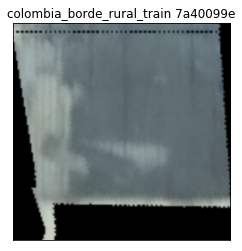

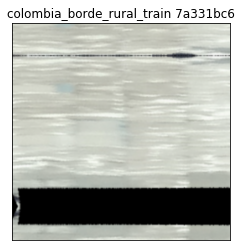

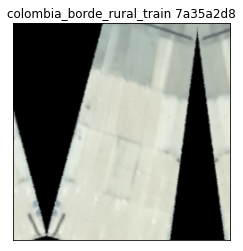

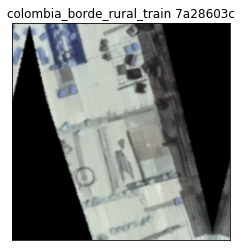

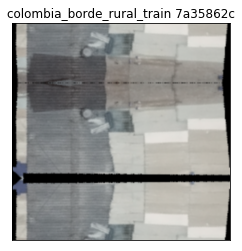

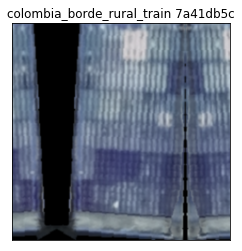

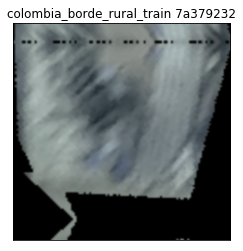

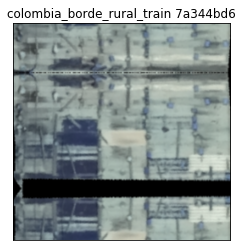

In [40]:
for img in colombia_borde_rural_train:
    im=Image.open(f'{train_images}/{img}.tif')
    mpl_show(im, 'colombia_borde_rural_train', title=f'{img}')

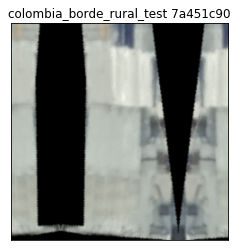

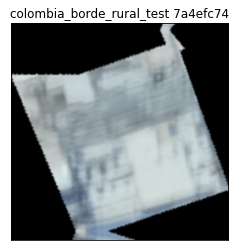

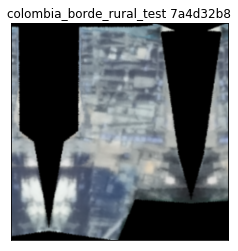

In [42]:
for img in colombia_borde_rural_test:
    im=Image.open(f'{test_images}/{img}.tif')
    mpl_show(im, 'colombia_borde_rural_test', title=f'{img}')